Mentor :
Hanny Nurrohmah

Disusun Oleh :
Kelompok 2 (Dua)

- Marshanda Gavrilla
- Maulana Khisyam
- Ridha Talasya Widyanti
- Rifat Muhammad


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import keras

from google.colab import files
from keras import models, layers, optimizers
from keras.models import Sequential
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 # Data Understanding

## Bussines Understanding
**Problem :**

---
This study aims to analyze flight booking data from the "Ease My Trip" website to identify patterns and factors influencing bookings, as well as to predict target variables using linear regression. The research will explore data distribution, test statistical hypotheses, and assess significant factors affecting ticket prices and booking numbers. These findings are expected to provide valuable insights that help prospective passengers make better decisions when booking flight tickets through the platform.

**Goals :**

---
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Data Description

1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

---
Transalte to Indonesia

---
1. Airline: Nama perusahaan maskapai penerbangan disimpan pada kolom maskapai penerbangan. Ini adalah fitur kategoris yang memiliki 6 maskapai berbeda.
2. Flight: Penerbangan menyimpan informasi mengenai kode penerbangan pesawat. Ini adalah fitur kategoris.
3. Source City: Kota asal penerbangan lepas landas. Ini adalah fitur kategoris yang memiliki 6 kota unik.
4. Departure Time: Ini adalah fitur kategoris turunan yang diperoleh dengan mengelompokkan periode waktu ke dalam bin. Ini menyimpan informasi tentang waktu keberangkatan dan memiliki 6 label waktu unik.
5. Stops: Fitur kategorikal dengan 3 nilai berbeda yang menyimpan jumlah perhentian antara kota sumber dan kota tujuan.
6. Arrival Time: Ini adalah fitur kategoris turunan yang dibuat dengan mengelompokkan interval waktu ke dalam bin. Ini memiliki enam label waktu berbeda dan menyimpan informasi tentang waktu kedatangan.
7. Destination City: Kota dimana penerbangan akan mendarat. Ini adalah fitur kategoris yang memiliki 6 kota unik.
8. Class: Fitur kategorikal yang berisi informasi kelas kursi; ia memiliki dua nilai berbeda: Bisnis dan Ekonomi.
9. Duration: Fitur berkelanjutan yang menampilkan jumlah keseluruhan waktu yang diperlukan untuk melakukan perjalanan antar kota dalam hitungan jam.
10. Days left: Ini adalah karakteristik turunan yang dihitung dengan mengurangkan tanggal perjalanan dengan tanggal pemesanan.
11. Price: Variabel target menyimpan informasi harga tiket.


# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Flight Price Prediction/dataset/Clean_Dataset.csv"
Data = pd.read_csv(path)

In [ ]:
# Create Data Frame
df=pd.DataFrame(Data)
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.shape

(300153, 12)

## Check Missing Value

In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.isin(['?']).sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Replace Value Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
# replace isi data variabel class
df['class'] = df['class'].replace('Business',1)
df['class'] = df['class'].replace('Economy',0)


In [ ]:
# replace isi data variabel stop

df['stops'] = df['stops'].replace('zero',0)
df['stops'] = df['stops'].replace('one',1)
df['stops'] = df['stops'].replace('two_or_more',2)


Label Encoder

In [ ]:
label_encoding_features = ['airline', 'flight','departure_time','arrival_time','source_city', 'destination_city']

label_encoder = LabelEncoder()
for col in label_encoding_features:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.dtypes

Unnamed: 0            int64
airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [ ]:
df.shape

(300153, 12)

In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,0,5,5,0,2.17,1,5953
1,1,4,1387,2,1,0,4,5,0,2.33,1,5953
2,2,0,1213,2,1,0,1,5,0,2.17,1,5956
3,3,5,1559,2,4,0,0,5,0,2.25,1,5955
4,4,5,1549,2,4,0,4,5,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1477,1,4,1,2,3,1,10.08,49,69265
300149,300149,5,1481,1,0,1,5,3,1,10.42,49,77105
300150,300150,5,1486,1,1,1,5,3,1,13.83,49,79099
300151,300151,5,1483,1,1,1,2,3,1,10.00,49,81585


# Exploratory Data Analysis

## Check Outlier

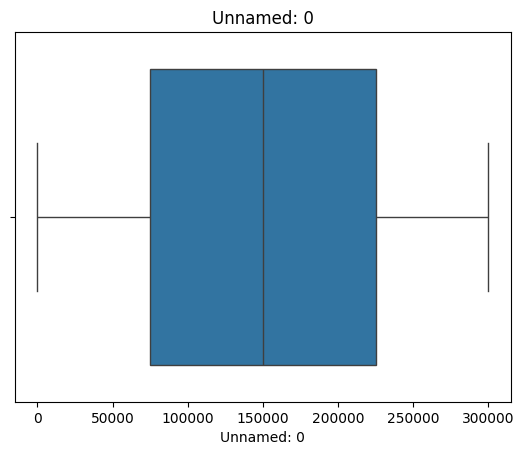

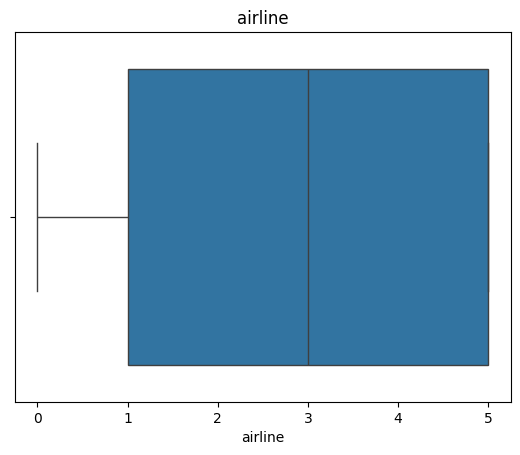

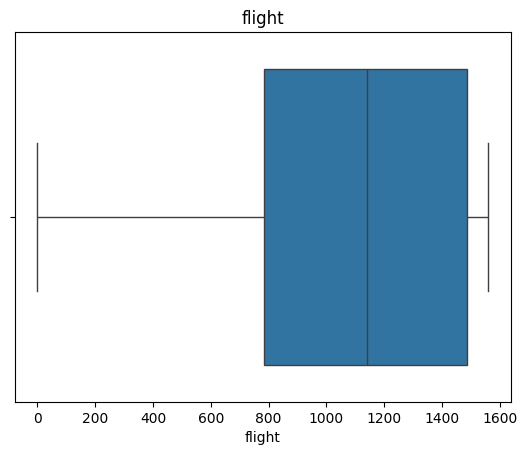

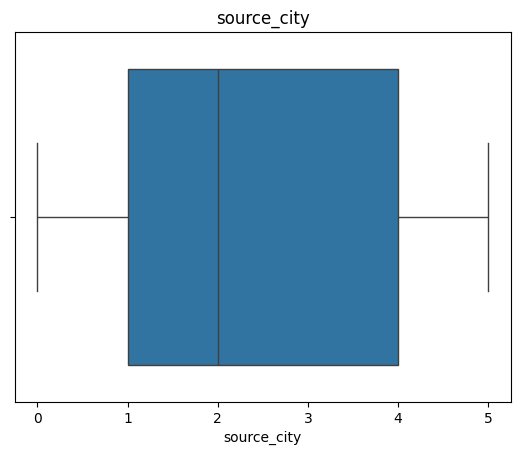

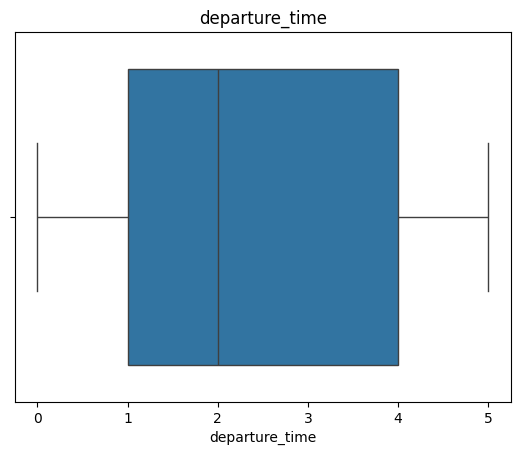

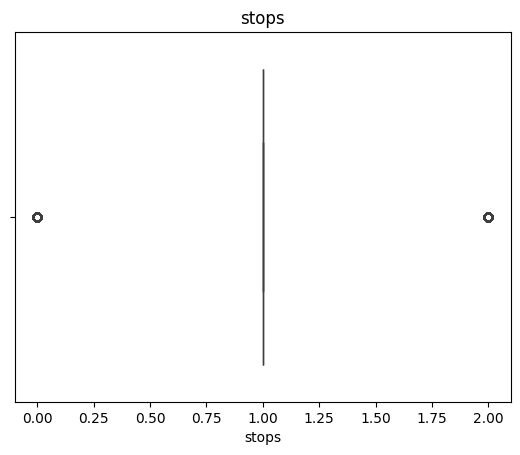

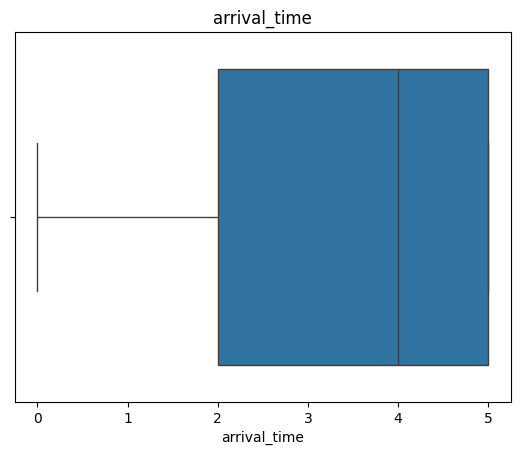

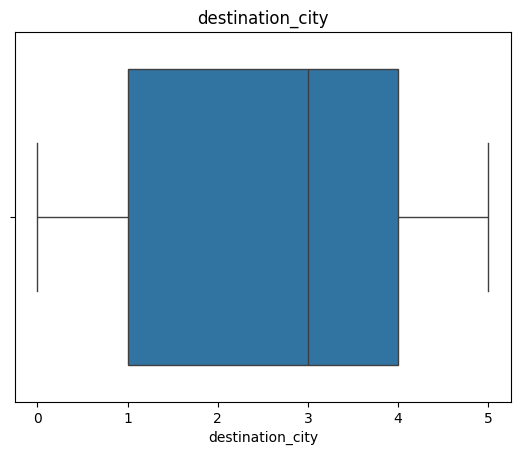

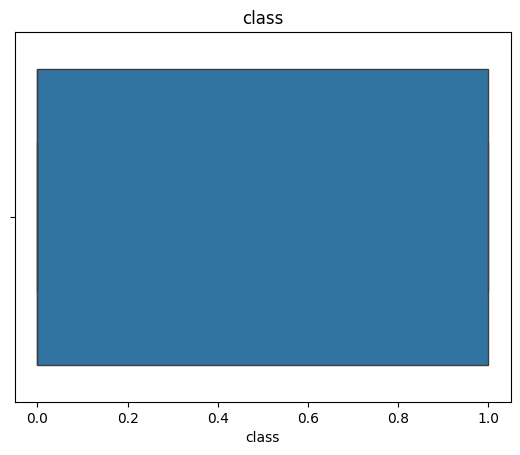

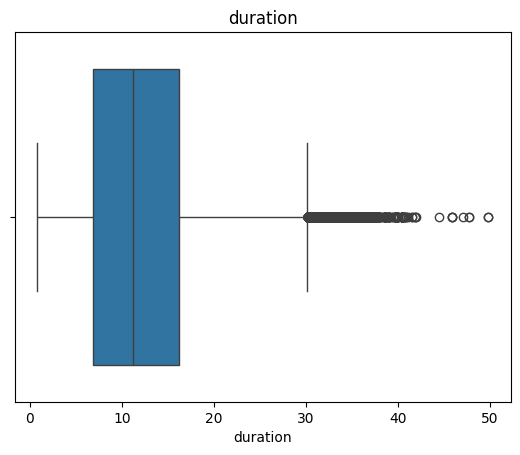

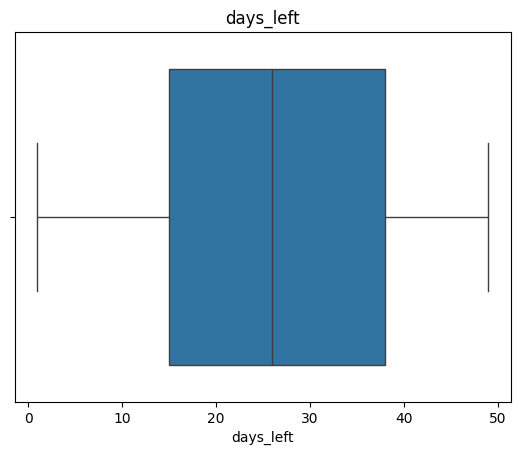

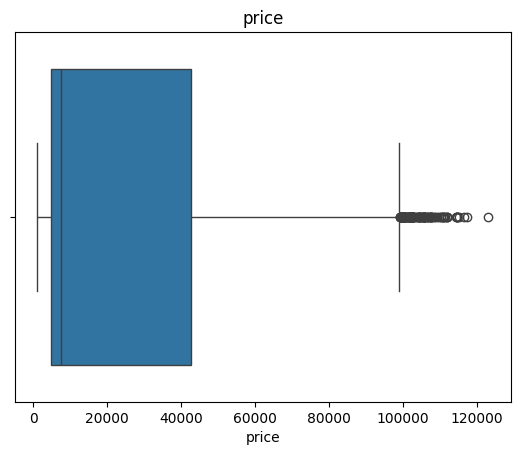

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# create boxplots for numerical columns
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(col)

In [ ]:
Q1 = df['airline'].quantile(0.25)
Q3 = df['airline'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['airline'] < lower_bound) | (df['airline'] > upper_bound)]
print(f"Number of Outlier in airline Column : {len(outliers)}")

Number of Outlier in airline Column : 0


In [ ]:
df.describe()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,3.104873,1088.336618,2.577592,2.417337,0.924312,3.074086,2.588303,0.311464,12.221021,26.004751,20889.660523
std,86646.852011,1.833265,426.694820,1.751762,1.754276,0.398106,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,1.000000,783.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,150076.000000,3.000000,1142.000000,2.000000,2.000000,1.000000,4.000000,3.000000,0.000000,11.250000,26.000000,7425.000000
75%,225114.000000,5.000000,1486.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,300152.000000,5.000000,1560.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


In [ ]:
selected_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']

# Deskripsikan kolom yang dipilih
description = df[selected_columns].describe()

print(description)

             airline         flight    source_city  departure_time  \
count  300153.000000  300153.000000  300153.000000   300153.000000   
mean        3.104873    1088.336618       2.577592        2.417337   
std         1.833265     426.694820       1.751762        1.754276   
min         0.000000       0.000000       0.000000        0.000000   
25%         1.000000     783.000000       1.000000        1.000000   
50%         3.000000    1142.000000       2.000000        2.000000   
75%         5.000000    1486.000000       4.000000        4.000000   
max         5.000000    1560.000000       5.000000        5.000000   

               stops   arrival_time  destination_city          class  \
count  300153.000000  300153.000000     300153.000000  300153.000000   
mean        0.924312       3.074086          2.588303       0.311464   
std         0.398106       1.741666          1.744543       0.463093   
min         0.000000       0.000000          0.000000       0.000000   
25%      

## Person Corelation


<Axes: title={'center': 'PERSON CORRELATION'}>

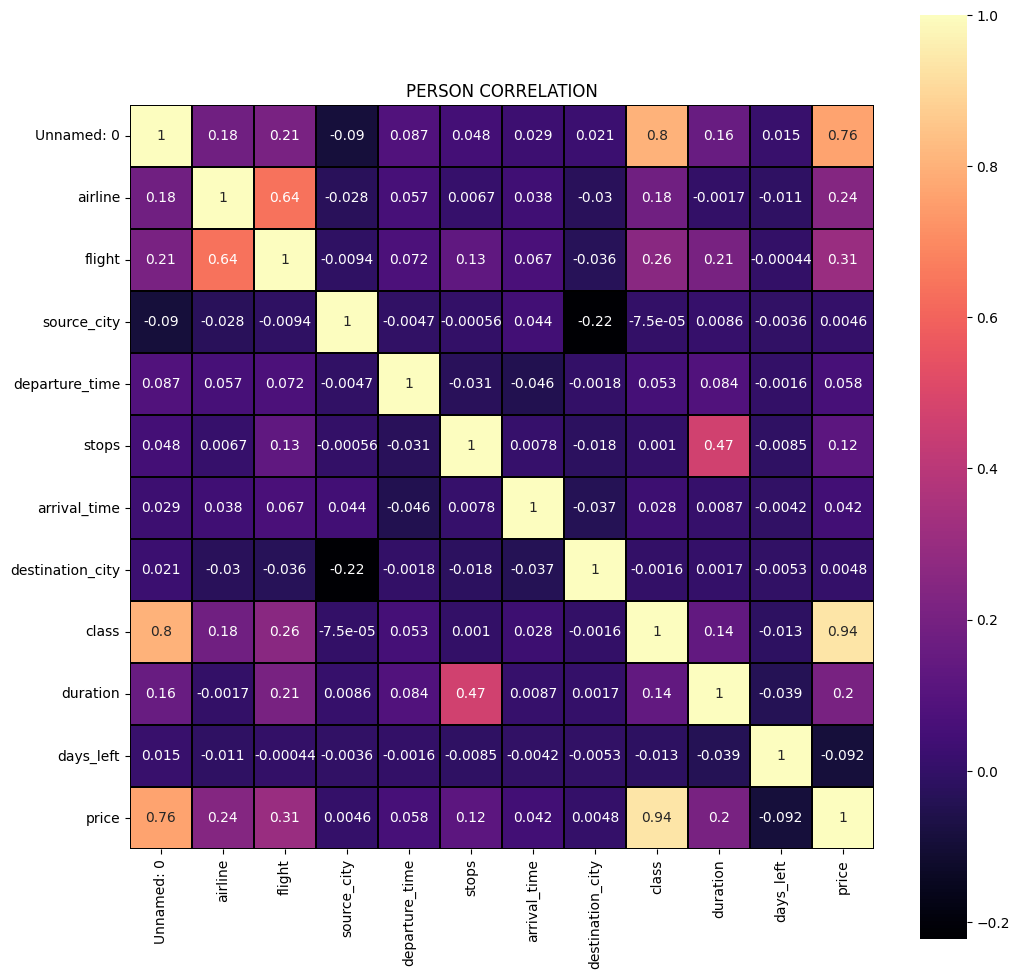

In [ ]:
f,ax=plt.subplots(figsize=(12,12))
plt.title("PERSON CORRELATION")
sns.heatmap(
    df.astype(float).corr(),
    linewidth=0.25,
    vmax=1.0,
    square=True,
    cmap='magma',
    linecolor='black',
    annot=True
    )

Berdasarkan hasil matriks korelasi, variabel yang sangat berpengaruh terhadap variabel target (price) untuk prediksi tiket penerbangan adalah variabel class. Nilai korelasi antara variabel class dan price adalah 0.94, yang mendekati nilai 1. Dengan kata lain, semakin tinggi nilai variabel class, semakin tinggi juga harga tiket penerbangan.

# Modeling

In [ ]:
X = df.drop(columns=['price'])
Y = df['price']

## Normalization With Standard Scaler


In [ ]:
StdSc = StandardScaler()
X = StdSc.fit_transform(df)

## Train And Test

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

##Machine Learning

### Linear Regression

R2 Score: 1.0
MAE: 2.4606732085437902e-11
MSE: 8.485735196453297e-22
RMSE: 2.913028526543003e-11
AIC: -2912587.203310449
BIC: -2912470.1692975815


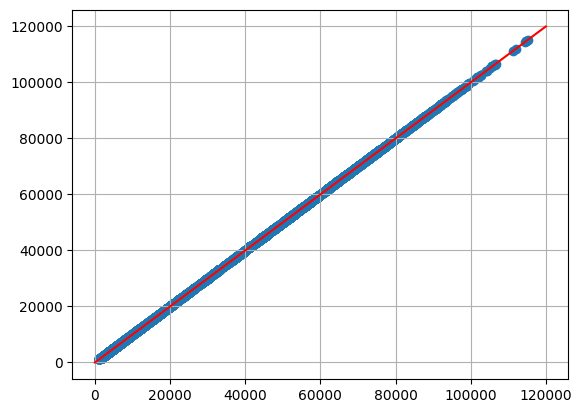

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_lr = model.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

r2_s = r2_score(y_test, y_pred_lr)
print('R2 Score:', r2_s)

mae = mean_absolute_error(y_test, y_pred_lr)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_lr)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Menghitung AIC dan BIC
n = len(y_test)
p = X_train.shape[1] + 1

rss = np.sum((y_test - y_pred_lr) ** 2)
aic = n * np.log(rss/n) + 2 * p
bic = n * np.log(rss/n) + np.log(n) * p

print('AIC:', aic)
print('BIC:', bic)

print("="*76)

plt.scatter(y_test, y_pred_lr)
plt.plot(np.arange(0,120000), np.arange(0,120000), color = 'red')
plt.grid(True)

### Random Forest Regressor


R2 Score: 0.9999996077659138
MAE: 0.34615282104247225
MSE: 202.18971850877062
RMSE: 14.21934311101503
AIC: 318740.9728301807
BIC: 318849.00422667403


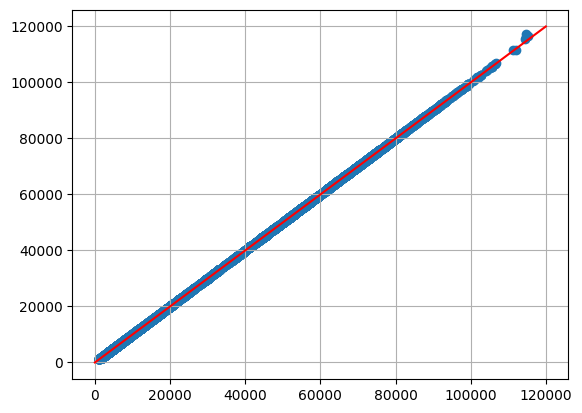

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model_rf = model.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model

r2_s = r2_score(y_test, y_pred_rf)
print('R2 Score:', r2_s)

mae = mean_absolute_error(y_test, y_pred_rf)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_rf)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

n = len(y_test)
p = len(model_rf.feature_importances_)

rss = np.sum((y_test - y_pred_rf) ** 2)
aic = n * np.log(rss/n) + 2 * p
bic = n * np.log(rss/n) + np.log(n) * p

print('AIC:', aic)
print('BIC:', bic)

print("="*76)

plt.scatter(y_test, y_pred_rf)
plt.plot(np.arange(0,120000), np.arange(0,120000), color = 'red')
plt.grid(True)

### Decision Tree Regressor

R2 Score: 0.9999934122742296
MAE: 0.6767336875947427
MSE: 3395.8558578068
RMSE: 58.27397238739436
AIC: 318740.9728301807
BIC: 739777.5605522944


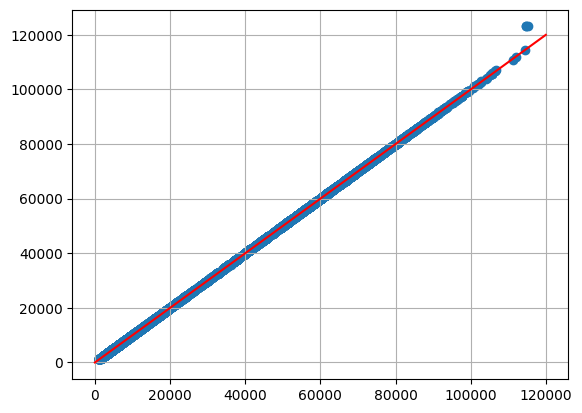

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model_dtr = model.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

r2_s = r2_score(y_test, y_pred_dtr)
print('R2 Score:', r2_s)

mae = mean_absolute_error(y_test, y_pred_dtr)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_dtr)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Menghitung AIC dan BIC
n = len(y_test)
p = model_dtr.tree_.node_count

rss = np.sum((y_test - y_pred_dtr) ** 2)
bic = n * np.log(rss/n) + np.log(n) * p

print('AIC:', aic)
print('BIC:', bic)

print("="*76)

plt.scatter(y_test, y_pred_dtr)
plt.plot(np.arange(0,120000), np.arange(0,120000), color = 'red')
plt.grid(True)

##Deep Learning

###Artificial Neural Network

In [ ]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(12,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
#Evaluate model
network.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [ ]:
exc = network.fit(X_train, y_train, epochs=50, batch_size=32,  verbose=1, validation_split=0.3)

Epoch 1/50
5253/5253 [==============================] - 16s 3ms/step - loss: 161354048.0000 - mae: 6434.1665 - val_loss: 8034970.0000 - val_mae: 2101.3501
Epoch 2/50
5253/5253 [==============================] - 15s 3ms/step - loss: 2982287.7500 - mae: 1237.7334 - val_loss: 912989.6250 - val_mae: 704.4854
Epoch 3/50
5253/5253 [==============================] - 16s 3ms/step - loss: 314633.6562 - mae: 378.6177 - val_loss: 25988.2480 - val_mae: 122.9358
Epoch 4/50
5253/5253 [==============================] - 15s 3ms/step - loss: 6386.9453 - mae: 49.9486 - val_loss: 533.0351 - val_mae: 16.0225
Epoch 5/50
5253/5253 [==============================] - 15s 3ms/step - loss: 233.9945 - mae: 10.8402 - val_loss: 96.4236 - val_mae: 7.6602
Epoch 6/50
5253/5253 [==============================] - 15s 3ms/step - loss: 77.7312 - mae: 6.5292 - val_loss: 77.3402 - val_mae: 6.9237
Epoch 7/50
5253/5253 [==============================] - 15s 3ms/step - loss: 48.5255 - mae: 4.9562 - val_loss: 82.8997 - val_mae

In [ ]:
y_pred = network.predict(X_test)

r2_s = r2_score(y_test, y_pred)
print('R2 Score:', r2_s)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

1876/1876 [==============================] - 2s 1ms/step
R2 Score: 0.9999999987575747
MAE: 0.6150766826299902
MSE: 0.6404482087848052
RMSE: 0.8002800814619875


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


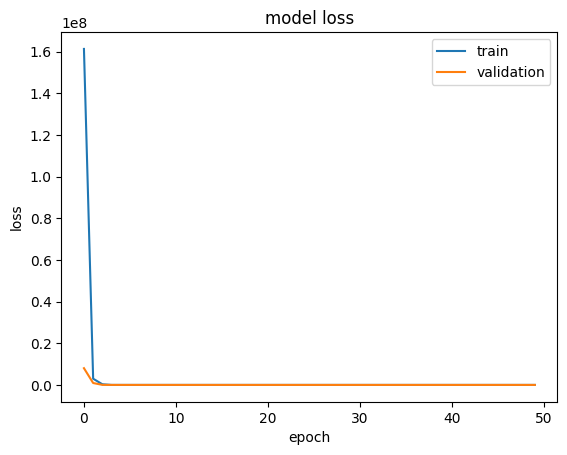

In [ ]:
print(exc.history.keys())
plt.plot(exc.history['loss'])
plt.plot(exc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Conclusion

Berdasarkan hasil dari comparasi performa model machine learning vs deep learning, Algoritma Linear Regression dalam Machine Leraning memiliki kinerja yang paling baik, dari pada model Random Forest, Decission Tree Regressor (machine learning) dan Artificial Neural Network (Deep Learning) dalam memprediksi harga tiket pesawat. Evaluasi model menunjukkan bahwa Linear Regression memiliki nilai matriks evaluasi seperti berikut,

* R2 Score : 1.0

* MAE: 2.4606732085437902e-11

* MSE: 8.485735196453297e-22

* RMSE: 2.913028526543003e-11

* AIC: -2912587.203310449

* BIC: -2912470.1692975815


#Convert to csv

In [ ]:
file_flight_predict=df.to_csv('file_flight_predict.csv')

files.download('file_flight_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>